## Mall Customer Segmentation

✅ Dataset loaded successfully.



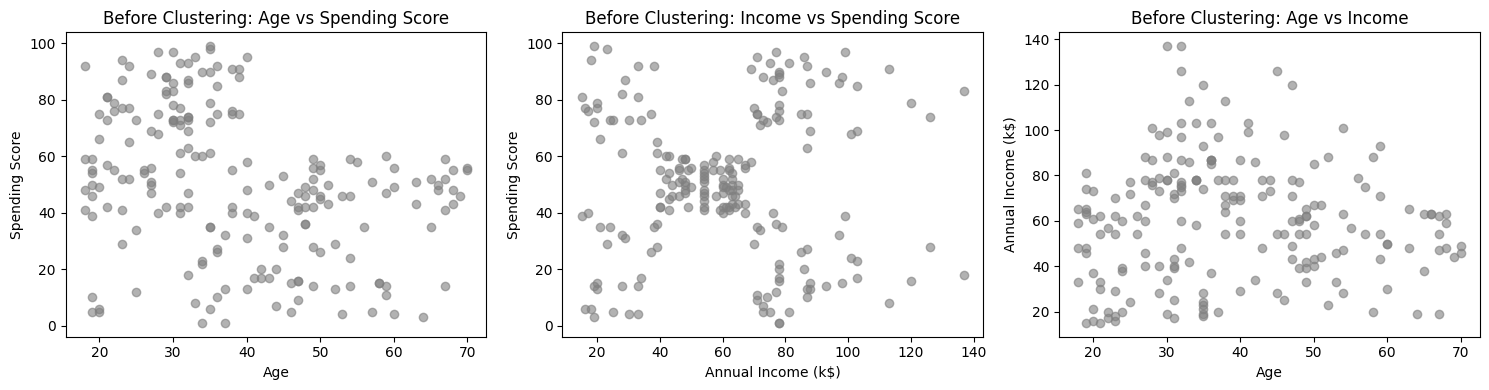

🔎 Hyperparameter tuning:
{'init': 'k-means++', 'n_clusters': 2, 'n_init': 10}  →  silhouette = 0.3355
{'init': 'k-means++', 'n_clusters': 2, 'n_init': 'auto'}  →  silhouette = 0.3355
{'init': 'k-means++', 'n_clusters': 3, 'n_init': 10}  →  silhouette = 0.3578
{'init': 'k-means++', 'n_clusters': 3, 'n_init': 'auto'}  →  silhouette = 0.3579
{'init': 'k-means++', 'n_clusters': 4, 'n_init': 10}  →  silhouette = 0.4040
{'init': 'k-means++', 'n_clusters': 4, 'n_init': 'auto'}  →  silhouette = 0.4040
{'init': 'k-means++', 'n_clusters': 5, 'n_init': 10}  →  silhouette = 0.4166
{'init': 'k-means++', 'n_clusters': 5, 'n_init': 'auto'}  →  silhouette = 0.4085
{'init': 'k-means++', 'n_clusters': 6, 'n_init': 10}  →  silhouette = 0.4284
{'init': 'k-means++', 'n_clusters': 6, 'n_init': 'auto'}  →  silhouette = 0.4311
{'init': 'k-means++', 'n_clusters': 7, 'n_init': 10}  →  silhouette = 0.4172
{'init': 'k-means++', 'n_clusters': 7, 'n_init': 'auto'}  →  silhouette = 0.4101
{'init': 'k-means++', 'n_cl

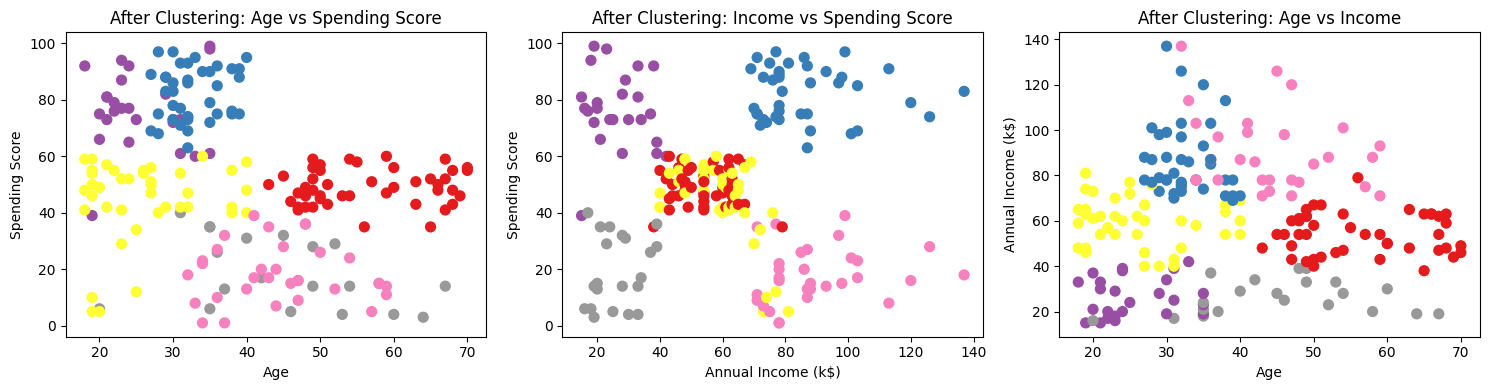

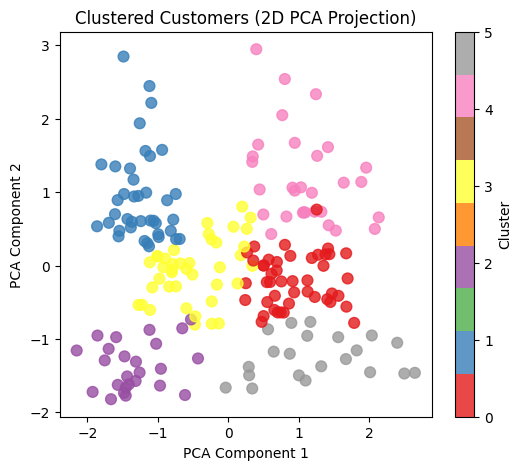


📄 Segmented data saved as 'segmented_customers.csv'


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid

# 1. Load Data
df = pd.read_csv("Mall_Customers.csv")
print("✅ Dataset loaded successfully.\n")

# 2. Select features
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = df[features]

# 3. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. BEFORE CLUSTERING – pairplot-like scatter plots
plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
plt.scatter(df["Age"], df["Spending Score (1-100)"], c='gray', alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Before Clustering: Age vs Spending Score")

plt.subplot(1, 3, 2)
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c='gray', alpha=0.6)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("Before Clustering: Income vs Spending Score")

plt.subplot(1, 3, 3)
plt.scatter(df["Age"], df["Annual Income (k$)"], c='gray', alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Before Clustering: Age vs Income")

plt.tight_layout()
plt.show()

# 5. Hyperparameter tuning using silhouette score
param_grid = {
    "n_clusters": range(2, 11),
    "init": ["k-means++", "random"],
    "n_init": [10, "auto"]
}

print("🔎 Hyperparameter tuning:")
best_score, best_model, best_params = -1, None, None

for params in ParameterGrid(param_grid):
    km = KMeans(random_state=42, **params)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"{params}  →  silhouette = {score:.4f}")

    if score > best_score:
        best_score, best_model, best_params = score, km, params

print("\n✅ Best params:", best_params, f"(silhouette {best_score:.4f})")

# 6. Add cluster labels
df["Cluster"] = best_model.labels_

# 7. AFTER CLUSTERING – same plots but with cluster coloring
plt.figure(figsize=(15,4))
colors = df["Cluster"]

plt.subplot(1, 3, 1)
plt.scatter(df["Age"], df["Spending Score (1-100)"], c=colors, cmap='Set1', s=50)
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("After Clustering: Age vs Spending Score")

plt.subplot(1, 3, 2)
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=colors, cmap='Set1', s=50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.title("After Clustering: Income vs Spending Score")

plt.subplot(1, 3, 3)
plt.scatter(df["Age"], df["Annual Income (k$)"], c=colors, cmap='Set1', s=50)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("After Clustering: Age vs Income")

plt.tight_layout()
plt.show()

# 8. PCA 2D projection
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Cluster"], cmap="Set1", s=60, alpha=0.8)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clustered Customers (2D PCA Projection)")
plt.colorbar(scatter, label="Cluster")
plt.show()

# 9. Save results
df.to_csv("segmented_customers.csv", index=False)
print("\n📄 Segmented data saved as 'segmented_customers.csv'")
